# Carga inicial

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datasets original y modificado
df_objetivo = pd.read_csv("../../data/raw/steel_energy_original.csv")
df = pd.read_csv("../../data/raw/steel_energy_modified.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35740 entries, 0 to 35739
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   date                                  35401 non-null  object
 1   Usage_kWh                             35339 non-null  object
 2   Lagging_Current_Reactive.Power_kVarh  35339 non-null  object
 3   Leading_Current_Reactive_Power_kVarh  35327 non-null  object
 4   CO2(tCO2)                             35370 non-null  object
 5   Lagging_Current_Power_Factor          35291 non-null  object
 6   Leading_Current_Power_Factor          35338 non-null  object
 7   NSM                                   35325 non-null  object
 8   WeekStatus                            35400 non-null  object
 9   Day_of_week                           35428 non-null  object
 10  Load_Type                             35432 non-null  object
 11  mixed_type_col              

In [4]:
df.describe(include='all')

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,mixed_type_col
count,35401,35339,35339,35327,35370,35291,35338,35325,35400,35428,35432,32294
unique,34753,4410,2918,1336,249,6478,3968,517,5,15,7,1002
top,NAN,3.06,0.0,0.0,0.0,100.0,100.0,52200.0,Weekday,Monday,Light_Load,unknown
freq,23,605,6866,22358,20009,7082,23037,357,24048,4876,17366,3612


# Limpieza General

In [5]:
# Limpieza General de df
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df = df.drop_duplicates().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35735 entries, 0 to 35734
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   date                                  35396 non-null  object
 1   usage_kwh                             35334 non-null  object
 2   lagging_current_reactive.power_kvarh  35334 non-null  object
 3   leading_current_reactive_power_kvarh  35322 non-null  object
 4   co2(tco2)                             35365 non-null  object
 5   lagging_current_power_factor          35286 non-null  object
 6   leading_current_power_factor          35333 non-null  object
 7   nsm                                   35320 non-null  object
 8   weekstatus                            35395 non-null  object
 9   day_of_week                           35423 non-null  object
 10  load_type                             35427 non-null  object
 11  mixed_type_col              

In [6]:
# Quitamos columna mixed_type_col
df = df.drop(columns=['mixed_type_col'])

# Correcciones de formato

In [10]:
df.sample(10)

,date,usage_kwh,lagging_current_reactive.power_kvarh,leading_current_reactive_power_kvarh,co2(tco2),lagging_current_power_factor,leading_current_power_factor,nsm,weekstatus,day_of_week,load_type
16796,24/06/2018 23:15,2.84,NaN,0.0,0.0,56.94,100.0,83700.0,Weekend,Sunday,Light_Load
737,08/01/2018 16:30,96.88,35.14,0.0,0.04,94.01,100.0,59400.0,Weekday,Monday,Medium_Load
17778,05/07/2018 04:45,3.1,5.04,0.0,0.0,52.39,100.0,17100.0,Weekday,Thursday,Light_Load
17853,05/07/2018 23:30,3.6,3.85,0.0,0.0,68.3,100.0,84600.0,Weekday,Thursday,Light_Load
19676,24/07/2018 23:15,2.95,5.44,0.0,0.0,47.67,100.0,83700.0,Weekday,Tuesday,Light_Load
28394,23/10/2018 18:45,75.64,41.58,0.0,0.03,87.63,100.0,67500.0,Weekday,Tuesday,Medium_Load
27412,13/10/2018 13:15,26.42,6.37,6.52,0.01,97.21,97.09,47700.0,Weekend,Saturday,Maximum_Load
22721,25/08/2018 16:30,6.37,0.0,16.85,0.0,100.0,35.36,59400.0,Weekend,Saturday,Light_Load
32208,02/12/2018 12:15,4.86,0.0,20.27,0.0,100.0,23.32,44956.0,Weekend,Sunday,Light_Load
27487,14/10/2018 08:00,NaN,4.97,0.0,0.0,48.28,100.0,28800.0,Weekend,Sunday,Light_Load


## Correción date

In [11]:
# Conversión de fecha
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce', infer_datetime_format=True)

C:\Users\uriel\AppData\Local\Temp\ipykernel_5876\2404955314.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date'] = pd.to_datetime(df['date'], errors='coerce', infer_datetime_format=True)


In [12]:
df["date"]

0       2018-01-01 00:15:00
1       2018-01-01 00:30:00
2       2018-01-01 00:45:00
3       2018-01-01 01:00:00
4       2018-01-01 01:15:00
                ...        
35730   2018-06-06 02:15:00
35731   2018-11-02 02:45:00
35732                   NaT
35733                   NaT
35734   2018-11-02 22:30:00
Name: date, Length: 35735, dtype: datetime64[ns]

## Correción columnas numéricas

In [ ]:
# Conversión de tipo object a float64
df['usage_kwh'] = pd.to_numeric(df['usage_kwh'], errors='coerce')
df['lagging_current_reactive.power_kvarh'] = pd.to_numeric(df['lagging_current_reactive.power_kvarh'], errors='coerce')
df['leading_current_reactive_power_kvarh'] = pd.to_numeric(df['leading_current_reactive_power_kvarh'], errors='coerce')
df['lagging_current_power_factor'] = pd.to_numeric(df['lagging_current_power_factor'], errors='coerce')
df['leading_current_power_factor'] = pd.to_numeric(df['leading_current_power_factor'], errors='coerce')
df["nsm"] = pd.to_numeric(df["nsm"], errors='coerce')
df["co2(tco2)"] = pd.to_numeric(df["co2(tco2)"], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35735 entries, 0 to 35734
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  13272 non-null  datetime64[ns]
 1   usage_kwh                             35219 non-null  float64       
 2   lagging_current_reactive.power_kvarh  35205 non-null  float64       
 3   leading_current_reactive_power_kvarh  35181 non-null  float64       
 4   co2(tco2)                             35225 non-null  float64       
 5   lagging_current_power_factor          35163 non-null  float64       
 6   leading_current_power_factor          35209 non-null  float64       
 7   nsm                                   35180 non-null  float64       
 8   weekstatus                            35373 non-null  object        
 9   day_of_week                           35408 non-null  object        
 10

## Corrección columnas texto

In [14]:
cols_texto = ['weekstatus', 'day_of_week', 'load_type']

for col in cols_texto:
    print(df[col].unique())

['Weekday' ' wEEKDAY ' nan 'Weekend' ' wEEKEND ' ' NAN ']
['Monday' ' mONDAY ' ' tUESDAY ' 'Tuesday' 'Wednesday' ' wEDNESDAY '
 'Thursday' ' tHURSDAY ' 'Friday' ' fRIDAY ' 'Saturday' ' sATURDAY '
 'Sunday' ' sUNDAY ' nan ' NAN ']
['Light_Load' ' lIGHT_lOAD ' nan 'Medium_Load' 'Maximum_Load'
 ' mEDIUM_lOAD ' ' mAXIMUM_lOAD ' ' NAN ']


In [15]:
# Normalizar formato de texto en tres columnas específicas
# cols_texto = ['WeekStatus', 'Day_of_week', 'Load_Type']

for col in cols_texto:
    if col in df.columns:
        # Convertir a minúsculas y luego capitalizar solo la primera letra
        df[col] = df[col].astype(str).str.strip()
        df[col] = df[col].astype(str).str.lower()
        df[col] = df[col].str.capitalize()


In [16]:
for col in cols_texto:
    print(df[col].unique())

['Weekday' 'Nan' 'Weekend']
['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday'
 'Nan']
['Light_load' 'Nan' 'Medium_load' 'Maximum_load']


In [17]:
# Identificar NaNs
for col in cols_texto:
    # Convertir texto 'nan', 'NaN', 'None', etc. en np.nan real
    df[col] = df[col].replace(['nan', 'Nan', 'None', 'NONE', 'Na'], np.nan)

    # Contar valores NaN después de las transformaciones
print("\nConteo de valores NaN por columna:")
print(df.isna().sum())


Conteo de valores NaN por columna:
date                                    22463
usage_kwh                                 516
lagging_current_reactive.power_kvarh      530
leading_current_reactive_power_kvarh      554
co2(tco2)                                 510
lagging_current_power_factor              572
leading_current_power_factor              526
nsm                                       555
weekstatus                                362
day_of_week                               327
load_type                                 328
dtype: int64


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35735 entries, 0 to 35734
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  13272 non-null  datetime64[ns]
 1   usage_kwh                             35219 non-null  float64       
 2   lagging_current_reactive.power_kvarh  35205 non-null  float64       
 3   leading_current_reactive_power_kvarh  35181 non-null  float64       
 4   co2(tco2)                             35225 non-null  float64       
 5   lagging_current_power_factor          35163 non-null  float64       
 6   leading_current_power_factor          35209 non-null  float64       
 7   nsm                                   35180 non-null  Int64         
 8   weekstatus                            35373 non-null  object        
 9   day_of_week                           35408 non-null  object        
 10

In [19]:
df.sample(20)

,date,usage_kwh,lagging_current_reactive.power_kvarh,leading_current_reactive_power_kvarh,co2(tco2),lagging_current_power_factor,leading_current_power_factor,nsm,weekstatus,day_of_week,load_type
8311,NaT,57.38,24.80,0.00,0.03,91.79,100.00,NaN,Weekday,Wednesday,Maximum_load
488,2018-06-01 02:15:00,4.18,5.47,0.00,0.00,60.72,100.00,8100.0,Weekend,Saturday,Light_load
30170,2018-11-11 06:45:00,3.46,6.44,0.00,0.00,47.33,100.00,24300.0,Weekend,Sunday,Light_load
31952,NaT,39.82,8.35,0.00,0.02,97.87,100.00,72900.0,Weekday,Thursday,Medium_load
2611,NaT,4.21,4.61,0.00,0.00,67.43,100.00,18000.0,Weekend,Sunday,Light_load
26025,NaT,2.59,4.10,0.00,0.00,53.41,100.00,9000.0,Weekend,Saturday,Light_load
26141,NaT,2.95,5.62,0.00,0.00,46.48,100.00,27000.0,Weekend,Sunday,Light_load
9681,2018-11-04 20:30:00,71.50,17.64,0.04,0.03,97.09,100.00,73800.0,Weekday,Wednesday,Medium_load
24339,2018-11-09 13:00:00,6.16,0.11,15.70,0.00,99.98,36.52,46800.0,Weekday,Tuesday,Medium_load
35173,NaT,2.88,0.00,13.79,0.00,100.00,20.44,72900.0,Weekday,Wednesday,Medium_load


In [20]:
# Llamar fila con indice igual a 32905

df[df.index == 32905]

,date,usage_kwh,lagging_current_reactive.power_kvarh,leading_current_reactive_power_kvarh,co2(tco2),lagging_current_power_factor,leading_current_power_factor,nsm,weekstatus,day_of_week,load_type
32905,2018-09-12 18:30:00,3.31,0.0,9.25,0.0,100.0,33.69,66600.0,Weekend,Sunday,Light_load


# Analisis Univariado

## Columna objetivo 🎯 usage_kwh

In [29]:
df.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type', 'mixed_type_col'],
      dtype='object')

In [30]:
# Análisis Univariado Boxplot

# Ajusta 'nombre_columna' al nombre real de tu variable

columna = 'usage_kwh'

percentil_99 = df[columna].quantile(0.99)

plt.figure(figsize=(6, 4))
plt.boxplot(df[columna].dropna(), vert=True, patch_artist=True)
#plt.yscale('log')
plt.axhline(y=percentil_99, color='red', linestyle='--', label=f'Percentil 99 ({percentil_99:.1f})')
plt.title(f'Distribución logarítmica de {columna}')
plt.ylabel(f'{columna} (escala log)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()



KeyError: 'usage_kwh'

In [ ]:
df[columna].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.99])

count    33485.000000
mean        29.025335
std         39.478689
min          2.560000
5%           2.770000
25%          3.240000
50%          4.720000
75%         51.300000
99%        128.340000
max        579.950000
Name: usage_kwh, dtype: float64

In [ ]:
p99 = df['usage_kwh'].quantile(0.99)
print(p99)

df_filtrado = df[df['usage_kwh'] <= 157]


128.34


In [ ]:
df_filtrado['usage_kwh'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.99])

count    33345.000000
mean        27.750719
std         33.300856
min          2.560000
5%           2.770000
25%          3.240000
50%          4.680000
75%         50.940000
99%        122.870000
max        156.240000
Name: usage_kwh, dtype: float64

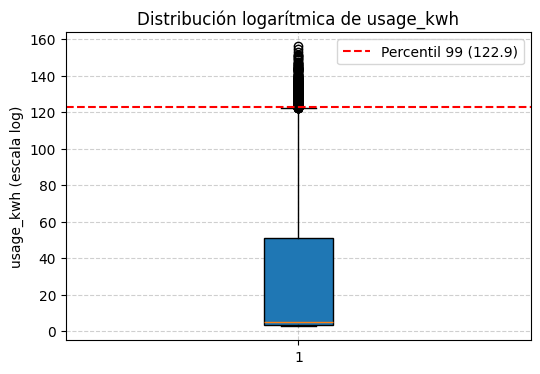

In [ ]:
columna = 'usage_kwh'

percentil_99 = df_filtrado[columna].quantile(0.99)

plt.figure(figsize=(6, 4))
plt.boxplot(df_filtrado[columna].dropna(), vert=True, patch_artist=True)
#plt.yscale('log')
plt.axhline(y=percentil_99, color='red', linestyle='--', label=f'Percentil 99 ({percentil_99:.1f})')
plt.title(f'Distribución logarítmica de {columna}')
plt.ylabel(f'{columna} (escala log)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

In [ ]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33345 entries, 1 to 35734
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  12396 non-null  datetime64[ns]
 1   usage_kwh                             33345 non-null  float64       
 2   lagging_current_reactive.power_kvarh  33345 non-null  float64       
 3   leading_current_reactive_power_kvarh  33345 non-null  float64       
 4   co2(tco2)                             33345 non-null  float64       
 5   lagging_current_power_factor          33345 non-null  float64       
 6   leading_current_power_factor          33345 non-null  float64       
 7   nsm                                   33345 non-null  float64       
 8   weekstatus                            33001 non-null  object        
 9   day_of_week                           33041 non-null  object        
 10  loa

## Columna lagging_current_reactive.power_kvarh

In [ ]:
df_filtrado.shape

(33345, 11)

In [ ]:

columna = 'Lagging_Current_Reactive.Power_kVarh'
print(df_objetivo[columna].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.99]))


columna = 'lagging_current_reactive.power_kvarh'
print(df_filtrado[columna].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.99]))




count    35040.000000
mean        13.035384
std         16.306000
min          0.000000
5%           0.000000
25%          2.300000
50%          5.000000
75%         22.640000
99%         62.902700
max         96.910000
Name: Lagging_Current_Reactive.Power_kVarh, dtype: float64
count    33345.000000
mean        13.987604
std         22.321463
min          0.000000
5%           0.000000
25%          2.380000
50%          5.040000
75%         22.610000
99%         66.029200
max        445.000000
Name: lagging_current_reactive.power_kvarh, dtype: float64


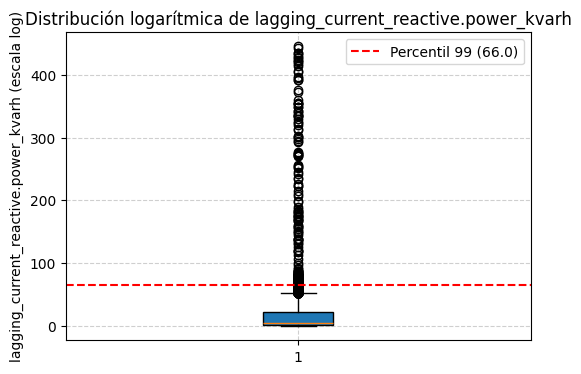

In [ ]:
# Ajusta 'nombre_columna' al nombre real de tu variable

percentil_99 = df[columna].quantile(0.99)

plt.figure(figsize=(6, 4))
plt.boxplot(df[columna].dropna(), vert=True, patch_artist=True)
#plt.yscale('log')
plt.axhline(y=percentil_99, color='red', linestyle='--', label=f'Percentil 99 ({percentil_99:.1f})')
plt.title(f'Distribución logarítmica de {columna}')
plt.ylabel(f'{columna} (escala log)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

## Columna CO2

In [ ]:
columna = 'co2(tco2)'
print(df[columna].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.96, 0.99,0.995]))

count    35225.000000
mean         2.636226
std         41.639451
min          0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.020000
96%          0.050000
99%          0.060000
99.5%        2.936400
max       1364.040000
Name: co2(tco2), dtype: float64


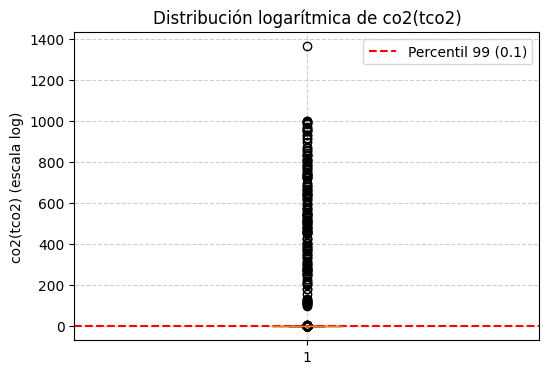

In [ ]:
# Ajusta 'nombre_columna' al nombre real de tu variable

percentil_99 = df[columna].quantile(0.99)

plt.figure(figsize=(6, 4))
plt.boxplot(df[columna].dropna(), vert=True, patch_artist=True)
#plt.yscale('log')
plt.axhline(y=percentil_99, color='red', linestyle='--', label=f'Percentil 99 ({percentil_99:.1f})')
plt.title(f'Distribución logarítmica de {columna}')
plt.ylabel(f'{columna} (escala log)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

In [ ]:
p99 = df[columna].quantile(0.99)
print(p99)

df = df[df[columna] <= 0.070]

0.06


# Columna nsm

In [27]:
df["nsm"].describe()

count         35180.0
mean     52648.078454
std      192898.81582
min               0.0
25%           21600.0
50%           43200.0
75%           64800.0
max         7783200.0
Name: nsm, dtype: Float64

# Analisis Multivariado

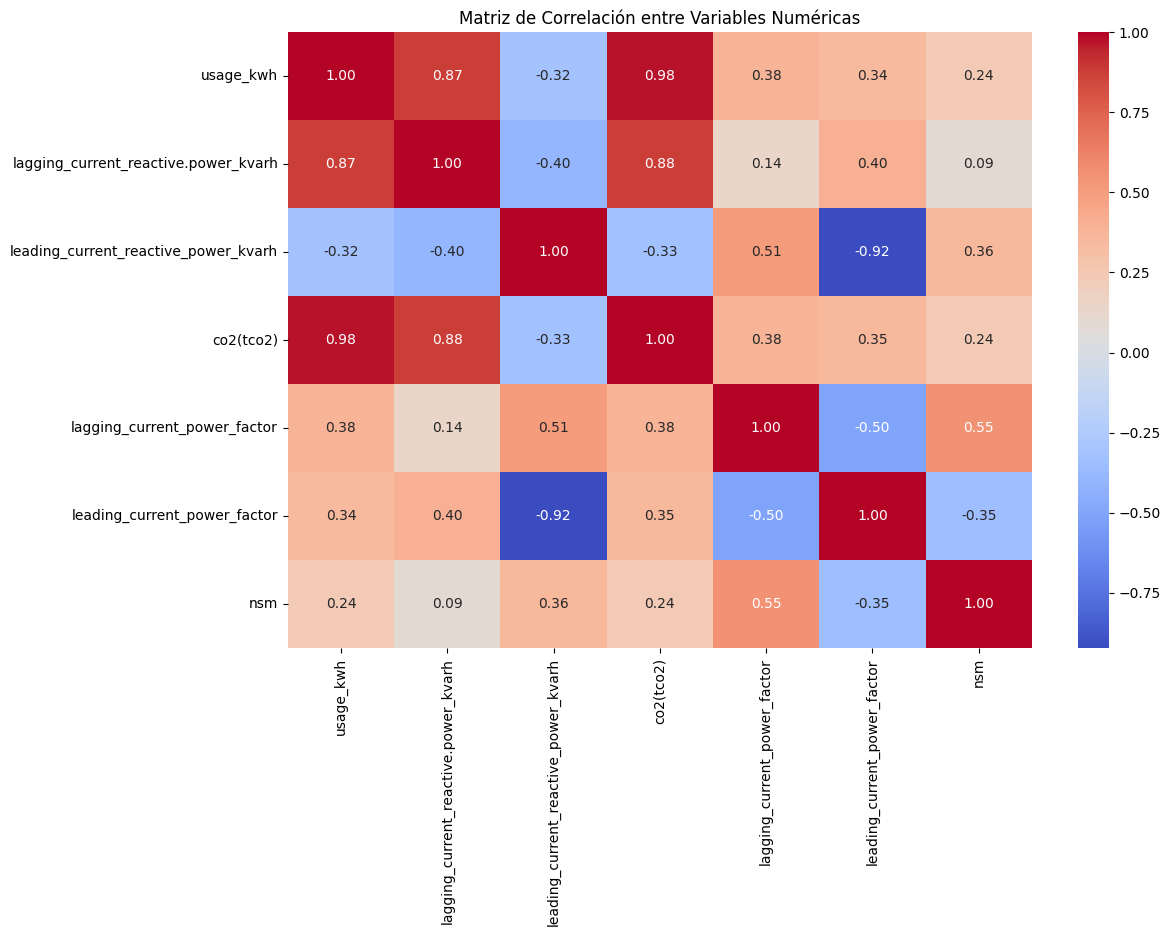

In [133]:
num_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
sns.heatmap(num_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

# Como queda df_modificado

In [296]:
df_objetivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [297]:
df_objetivo.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [301]:
df_objetivo.sample(10)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
3760,09/02/2018 04:15,4.79,5.36,0.0,0.00,66.63,100.00,15300,Weekday,Friday,Light_Load
17942,06/07/2018 21:45,4.07,0.00,16.6,0.00,100.00,23.81,78300,Weekday,Friday,Medium_Load
1763,19/01/2018 09:00,71.64,32.00,0.0,0.03,91.31,100.00,32400,Weekday,Friday,Light_Load
20186,30/07/2018 06:45,2.70,4.79,0.0,0.00,49.10,100.00,24300,Weekday,Monday,Light_Load
7880,24/03/2018 02:15,3.71,4.50,0.0,0.00,63.61,100.00,8100,Weekend,Saturday,Light_Load
33345,14/12/2018 08:30,94.18,60.84,0.0,0.04,84.00,100.00,30600,Weekday,Friday,Light_Load
12224,08/05/2018 08:15,35.14,31.36,0.0,0.02,74.61,100.00,29700,Weekday,Tuesday,Light_Load
6650,11/03/2018 06:45,3.24,3.24,0.0,0.00,70.71,100.00,24300,Weekend,Sunday,Light_Load
20847,06/08/2018 04:00,2.74,4.97,0.0,0.00,48.28,100.00,14400,Weekday,Monday,Light_Load
13497,21/05/2018 14:30,59.94,33.95,0.0,0.03,87.01,100.00,52200,Weekday,Monday,Maximum_Load


In [150]:
df_objetivo.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [151]:
# Columna date de df_modificado
columna = 'Usage_kWh'
df_objetivo[columna].describe()

count    35040.000000
mean        27.386892
std         33.444380
min          0.000000
25%          3.200000
50%          4.570000
75%         51.237500
max        157.180000
Name: Usage_kWh, dtype: float64

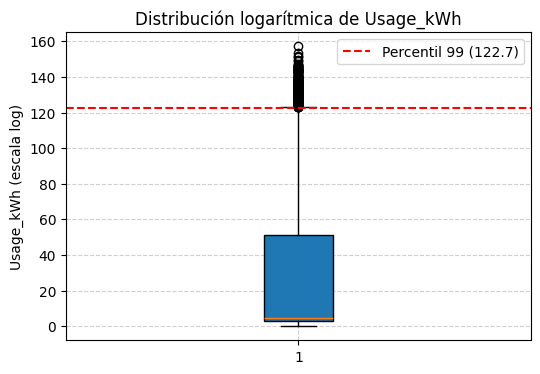

In [152]:


percentil_99 = df_objetivo[columna].quantile(0.99)

plt.figure(figsize=(6, 4))
plt.boxplot(df_objetivo[columna].dropna(), vert=True, patch_artist=True)
plt.axhline(y=percentil_99, color='red', linestyle='--', label=f'Percentil 99 ({percentil_99:.1f})')
plt.title(f'Distribución logarítmica de {columna}')
plt.ylabel(f'{columna} (escala log)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

In [542]:
df_objetivo[columna].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.99])

count    35040.000000
mean         0.011524
std          0.016151
min          0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.020000
99%          0.060000
max          0.070000
Name: CO2(tCO2), dtype: float64

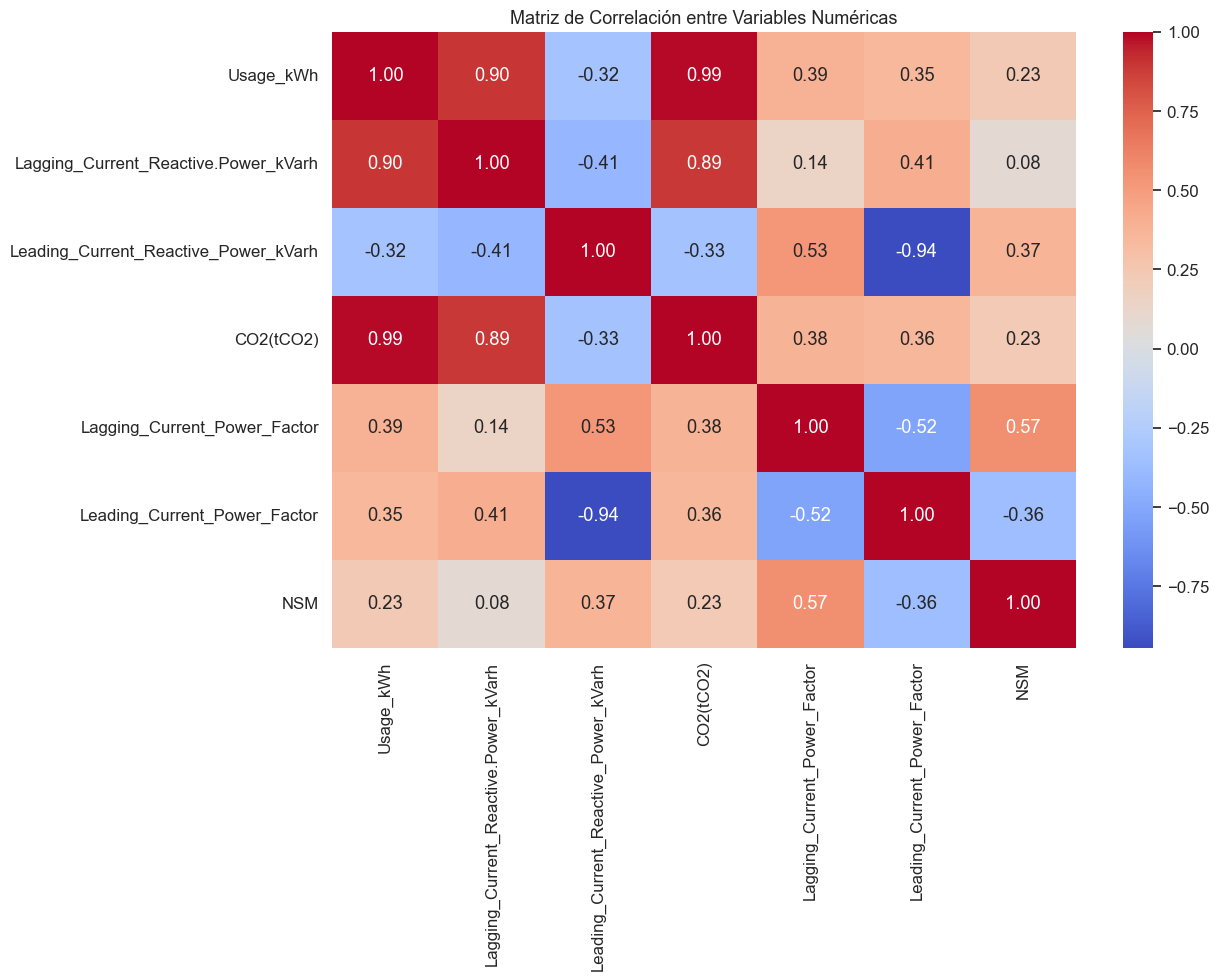

In [414]:
num_df = df_objetivo.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
sns.heatmap(num_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

# Limpieza

In [ ]:
# Paso 1: Convertir columnas específicas a numéricas
numeric_columns = [
    'usage_kwh', 'lagging_current_reactive.power_kvarh',
       'leading_current_reactive_power_kvarh', 'co2(tco2)',
       'lagging_current_power_factor', 'leading_current_power_factor',
    'nsm'
]

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Paso 2: Convertir la columna de fecha
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Paso 3: Eliminar filas completamente vacías
df.dropna(how='all', inplace=True)

# Paso 4: Eliminar filas con nulos en columnas críticas
# df.dropna(subset=['usage_kwh', 'nsm'], inplace=True)

for col in numeric_columns:
    if col in df.columns:
        mean_value = df[col].mean()
        df[col].fillna(mean_value, inplace=True)

# Paso 5: Detectar columnas numéricas reales
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Paso 6: Eliminar outliers extremos solo si hay suficientes datos
for col in num_cols:
    if df[col].nunique() > 10:  # Evita columnas con baja variedad
        lower = df[col].quantile(0.005)
        upper = df[col].quantile(0.995)
        df = df[(df[col] >= lower) & (df[col] <= upper)]

# Paso 7: Aplicar log1p (logaritmo natural + 1) solo si todos los valores son positivos
# for col in num_cols:
#     if (df[col] > 0).all():
#         df[col] = np.log1p(df[col])

C:\Users\uriel\AppData\Local\Temp\ipykernel_3388\1646950166.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)


In [130]:
df.shape

(33893, 11)

In [132]:
# Paso 1: Convertir columnas específicas a numéricas
numeric_columns = [
    'usage_kwh', 'lagging_current_reactive.power_kvarh',
    'leading_current_reactive_power_kvarh', 'co2(tco2)',
    'lagging_current_power_factor', 'leading_current_power_factor',
    'nsm'
]

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Paso 2: Convertir la columna de fecha
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Paso 3: Eliminar filas completamente vacías
df.dropna(how='all', inplace=True)

# ✅ Paso 4 (modificado): Rellenar valores nulos con la media de cada columna numérica
for col in numeric_columns:
    if col in df.columns:
        mean_value = df[col].mean()
        df[col].fillna(mean_value, inplace=True)

# Paso 5: Detectar columnas numéricas reales
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Paso 6: Eliminar outliers extremos solo si hay suficientes datos
for col in num_cols:
    if df[col].nunique() > 10:  # Evita columnas con baja variedad
        lower = df[col].quantile(0.001)
        upper = df[col].quantile(0.995)
        df = df[(df[col] >= lower) & (df[col] <= upper)]

# Paso 7: Aplicar log1p (logaritmo natural + 1) solo si todos los valores son positivos
# for col in num_cols:
#     if (df[col] > 0).all():
#         df[col] = np.log1p(df[col])


C:\Users\uriel\AppData\Local\Temp\ipykernel_11192\1050127679.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)


In [435]:
df.sample(10)

,date,usage_kwh,lagging_current_reactive.power_kvarh,leading_current_reactive_power_kvarh,co2(tco2),lagging_current_power_factor,leading_current_power_factor,nsm,weekstatus,day_of_week,load_type
15705,NaT,7.49,0.00,23.15,0.00,100.00,30.780000,52200.0,Weekday,Wednesday,Maximum_load
19990,NaT,3.24,5.44,0.00,0.00,51.17,100.000000,20700.0,Weekend,Saturday,Light_load
14799,2018-04-06 04:00:00,3.17,5.18,0.00,0.00,52.20,100.000000,14400.0,Weekday,Monday,Light_load
29979,2018-09-11 07:00:00,2.84,4.43,0.00,0.00,53.97,100.000000,25200.0,Weekday,Friday,Light_load
32409,2018-04-12 14:30:00,52.88,24.52,0.00,0.02,90.72,100.000000,52200.0,Weekday,Tuesday,Medium_load
19155,NaT,26.32,4.64,0.32,0.01,98.48,99.990000,46800.0,Weekday,Thursday,Medium_load
5872,2018-03-03 04:15:00,3.42,3.10,0.00,0.00,74.09,100.000000,15300.0,Weekend,Saturday,Light_load
30350,NaT,4.82,6.30,0.00,0.00,60.76,109.391626,13500.0,Weekday,Tuesday,Light_load
5510,NaT,72.40,33.34,0.00,0.03,90.83,100.000000,35100.0,Weekday,Tuesday,Medium_load
27306,2018-12-10 10:45:00,62.78,41.58,0.00,0.03,83.37,100.000000,38700.0,Weekday,Friday,Maximum_load


# Ale ayudame a Guardar esto:

In [ ]:
df.head(10)# Guardar el DataFrame limpio en un nuevo archivo CSV
df.to_csv("../../data/clean/steel_energy_cleaned.csv", index=False)